<a href="https://colab.research.google.com/github/Zanatyy/Predicting-Car-Prices-Using-Linear-Regression/blob/main/carsprices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Colab commands

In [2]:
!unzip /content/3_1_linear-regression-practical-example-part-1-dataset(1).zip

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `unzip /content/3_1_linear-regression-practical-example-part-1-dataset(1).zip'


#Reading and checking data

In [3]:
data=pd.read_csv('/content/3_1_linear-regression-practical-example-part-1-dataset (1).zip')

In [4]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [5]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


# Cleaning Data

Since Model name is irrelevant to our process we will be dropping it.

In [6]:
data=data.drop(columns=['Model'])

Now, we check for N/As.

In [7]:
#Data before dropping NAs
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
data=data.dropna(axis=0,subset=['Price','EngineV'])
#Data after dropping NAs
data.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

#Preparing Data and Creating Dummies

Brand and Engine type are categorical data. We will create dummies for them.

In [9]:
#Car brands included in dataset.
data['Brand'].value_counts()

Volkswagen       880
Mercedes-Benz    823
BMW              640
Toyota           510
Renault          445
Audi             420
Mitsubishi       307
Name: Brand, dtype: int64

In [10]:
#Engine types we have in data.
data['Engine Type'].value_counts()

Diesel    1861
Petrol    1468
Gas        590
Other      106
Name: Engine Type, dtype: int64

Now, we create dummies.

In [11]:
data=pd.get_dummies(data,drop_first=True)
data

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,35,1.6,2014,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,125000.0,9,3.0,2014,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,6500.0,1,3.5,1999,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4342,8000.0,194,2.0,1985,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


#Checking distribution functions
We look for outlier samples to drop them.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


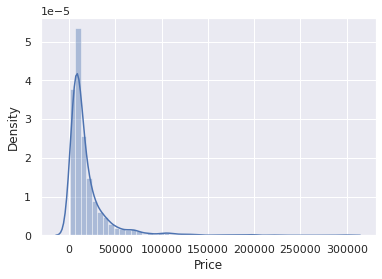

In [12]:
sns.distplot(data['Price'])


We notice that we have a positive tail, so we will drop highest 1% of prices.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


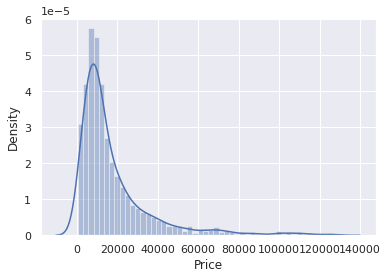

In [13]:
q=data['Price'].quantile(0.99)
data=data[data['Price']<q]
sns.distplot(data['Price'])

We do the same with Mileage.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


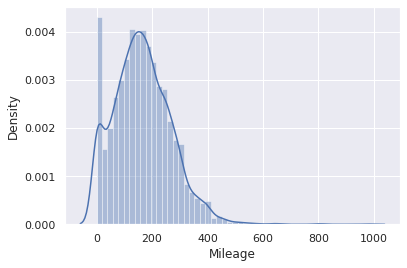

In [14]:
sns.distplot(data['Mileage'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


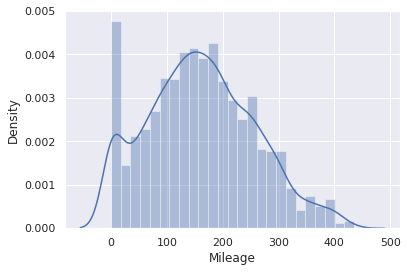

In [15]:
q=data['Mileage'].quantile(0.99)
data=data[data['Mileage']<q]
sns.distplot(data['Mileage'])

Now we plot every input in respect to prices.

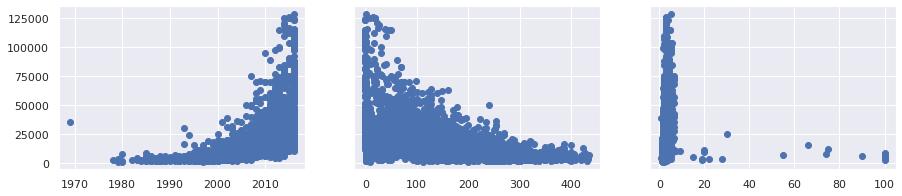

In [16]:
f, (ax1, ax2, ax3)= plt.subplots(1,3,sharey=True, figsize=(15,3))
ax1.scatter(data['Year'],data['Price'])
ax2.scatter(data['Mileage'],data['Price'])
ax3.scatter(data['EngineV'],data['Price'])
plt.show()

We notice that Year and Mileage look like Log plots. That's why we will convert prices into logs. We also notice that there's something wrong with EngineV. After googling some info about Engine Volume we notice that most Engines have volume are around 7. So first of all we drop any sample which has EV>7.

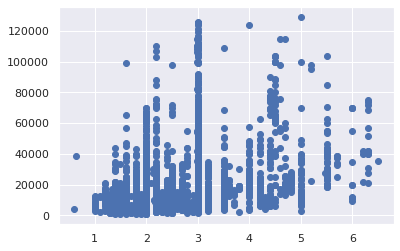

In [17]:
data=data[data['EngineV'] < 7]
plt.scatter(data['EngineV'],data['Price'])


Then we convert prices into logs.

In [18]:
data['log_price']=np.log(data['Price'])

In [19]:
data['log_price']

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
4339     9.792556
4340    11.736069
4341     8.779557
4342     8.987197
4344     9.510445
Name: log_price, Length: 3922, dtype: float64

In [20]:
data['Year']

0       1991
1       1999
2       2003
3       2007
4       2011
        ... 
4339    2014
4340    2014
4341    1999
4342    1985
4344    2013
Name: Year, Length: 3922, dtype: int64

Conversion successful! :D

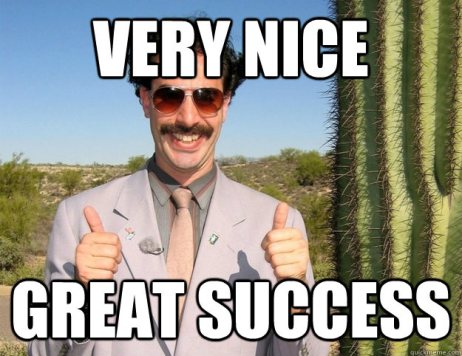

#Arranging dataset columns

In [21]:
data.columns.values

array(['Price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'log_price'], dtype=object)

In [22]:
#arranging columns
titles=['Price','log_price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',]
data=data.reindex(columns=titles)
data

,Price,log_price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,8.342840,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,8.974618,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,9.495519,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,10.043249,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,9.814656,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,9.792556,35,1.6,2014,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,125000.0,11.736069,9,3.0,2014,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,6500.0,8.779557,1,3.5,1999,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4342,8000.0,8.987197,194,2.0,1985,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


Now data looks relatively better than last time.

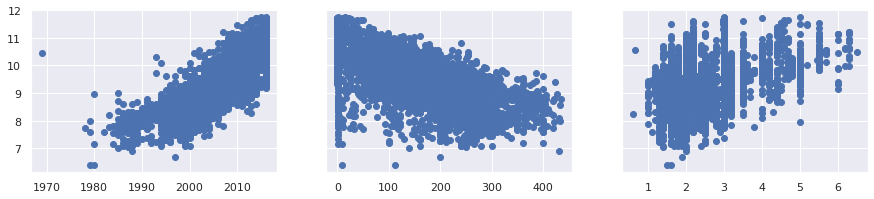

In [23]:
f, (ax1, ax2, ax3)= plt.subplots(1,3,sharey=True, figsize=(15,3))
ax1.scatter(data['Year'],data['log_price'])
ax2.scatter(data['Mileage'],data['log_price'])
ax3.scatter(data['EngineV'],data['log_price'])
plt.show()

#VIF to check for Multicollinearity
Most variables which has VIF more than 5 suffer from Multicollinearity. VIF is too relative since it depends on context of variables. However we can ignore it if it's a variable of interest.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vars=data[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(vars.values,i) for i in range (vars.shape[1])]
vif['Features']=vars.columns
vif

,VIF,Features
0,3.791774,Mileage
1,10.374484,Year
2,7.647392,EngineV


I'll choose to drop Year column since it's VIF is too extreme.

In [25]:
data=data.drop(['Year'],axis=1)

In [26]:
data

,Price,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,125000.0,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,6500.0,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4342,8000.0,8.987197,194,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


#Getting ready for our model
First, we declare our inputs and targets.

In [27]:
y=data['log_price']
x=data.drop(columns=['log_price'])

Then we scale data.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x)
inputs_scaled=scaler.transform(x)

#Train-test split

In [29]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test = train_test_split(inputs_scaled,y,test_size=0.2)


#Creaing our regression model

In [38]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Regression model created! Now let's take a look at plots between targets and predicted values.

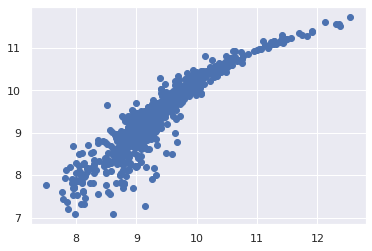

In [39]:
yhat=LR.predict(x_test)

plt.scatter(yhat,y_test)

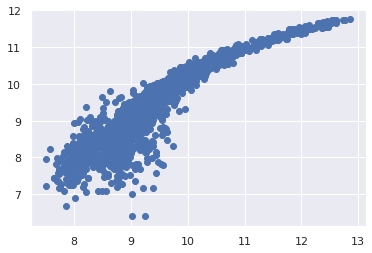

In [50]:
y_hat=LR.predict(x_train)

plt.scatter(y_hat,y_train)

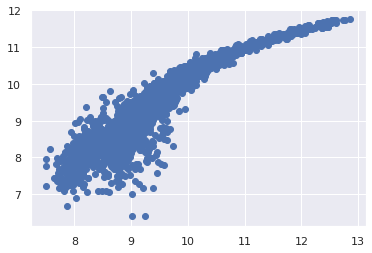

In [37]:
y_hat_total=LR.predict(inputs_scaled)
plt.scatter(y_hat_total,y)

We got acceptable results.

In [42]:
LR.score(x_train,y_train)

0.8425317568196731

In [43]:
LR.score(x_test,y_test)

0.8483031970271124

Looking at the error histogram we'll notice that the error is normally distributed and the mean is around 0. Great!

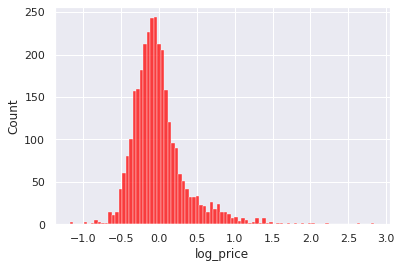

In [57]:
sns.histplot(y_hat-y_train,color='red')
